<a href="https://colab.research.google.com/github/Anali24/SIMULACION-I/blob/main/Transporte_SI.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

1. La empresa TIBASA (fabricante de tinas de baño) tiene asignado un camión especial
para el transporte de tinas terminadas. Dicho camión transporta diariamente 5 tinas.
El peso de cada tina sigue la siguiente distribución de probabilidad:
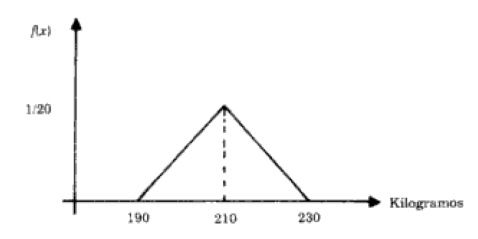

Si la capacidad del camión es de una tonelada, ¿cuál es la probabilidad de que el peso de las tinas exceda la capacidad del camión?

(a) Resolver analíticamente.

(b) Resolver por simulación.


***a)Analiticamente***

Sabemos que corresponde a una función de Distribución Triangular . Así entonces:

$ x_{i} \sim  Tri (a,b,c) $ : peso

con a =190 ;
c=210 ;
b= 230

Condición:

$x_1 + x_2 + x_3 + x_4 +x_5 > 1000 $

Decimos que $ > 1000 $, ya que , nos dice que si excede la toneladas, tendremos que pagar un transporte extra.

De esta forma dada la gráfica obtendremos su función de Distribución, para obtener la Media  $\mu $ y Var(x) $\sigma^2$.






Obtenemos las rectas de cada una , para obtener la función:

  $x_1 = (190,0)$

  $x_2 = (210,0)$

Obteniendo la pendiente:
  $m_1 = \frac{1/20}{20} = \frac{1}{400}$

Así la recta dada por la fórmula $ y - y_1 = m(x - x_1)$


$	\Rightarrow y = \frac{1}{400}(x -190)  $  si  $ 190 \leqslant x < 210$

De la misma forma calculamos la segunda recta:

  $x_1 = (230,0)$

  $x_2 = (210,\frac{1}{20})$

$m_2 = \frac{1/20}{-20} = \frac{-1}{400}$

$	\Rightarrow y = \frac{-1}{400}(x -230)  $  si  $ 210 \leqslant x \leqslant230 $




La función $f(x) $ definida por partes es:

$f(x) = \left\{
\begin{matrix}
\frac{1}{400}(x -190), & 190 \leq x < 210 \\
-\frac{1}{400}(x -230), & 210 \leq x \leq 230
\end{matrix} \right.$

Calculamos media :

$  \mu = E[x] = \int_{-\infty}^{\infty} xf(x)dx $

$\Rightarrow \mu = \frac{1}{400} \int_{190}^{210} x(x - 190)dx - \frac{1}{400} \int_{210}^{230} x(x - 230)dx $

$ =  \frac{1}{400} \left[ \frac{x^3}{3} - \frac{190x^2}{2} \Bigg|_{210}^{190} -  \frac{1}{400}  \frac{x^3}{3} - \frac{230x^2}{2} \Bigg|_{230}^{210} \right] = 210 $

$ \Rightarrow \mu = 210 $

Calculamos la varianza:

$ \text{Var}[X] = \int_{-\infty}^{\infty} (x - \mu)^2 f(x)dx$

$ = \frac{1}{400} \int_{190}^{210} (x - 210)^2 (x - 190)dx - \frac{1}{400} \int_{210}^{230} (x - 210)^2 (x - 230)dx  $

$ = \frac{1}{400} \left[ \frac{x^4}{4} - \frac{610x^3}{3} + \frac{123900x^2}{2} - 8374000x  \right] \Bigg|_{190}^{210}
$

$- \frac{1}{400} \left[ \frac{x^4}{4} - \frac{650 x ^3}{3} + \frac{140700 x ^2}{2} - 10143000x \Bigg|_{230}^{210} \right ]$

$  \text{Var}[X]= σ^2 = \frac{200}{3} \approx 66.6667  $


Queremos Calcular :
P( $x_1 + x_2 + x_3 + x_4 +x_5 > 1000 $ )

Usando el Teorema Central del Límite:
Válido para $ n \geqslant 4 $

 $  	\Rightarrow \lim_{n \to \infty} P (\frac{x_1 + x_2 + ... + x_n - n*\mu}{σ \sqrt n} < x )  = \phi (x) $

Considerando n=5 , $μ = 210 $ , $σ = \sqrt \frac{200}{3} $

Escribimos:

$\frac{x_1 + x_2 + x_3 + x_4 +x_5 - 5*210 }{\sqrt \frac{200}{3} * \sqrt 5} < \frac{1000 - 5(210)}{\sqrt \frac{200}{3} * \sqrt 5} $


Haciendo $ z = \frac{x_1 + x_2 + x_3 + x_4 +x_5 - 5*210 }{\sqrt \frac{200}{3} * \sqrt 5}$ un cambio de Variable
$ \Rightarrow z < -2.73 $

Sustituyendo en el Teorema:

$ P( z < -2.73) = Φ(-2.73)$

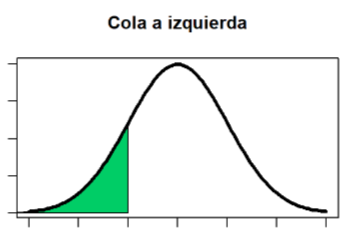

Dado que nos encontramos en el lado negativo entonces:




$ = 1- Φ(-2.73) $
$ = 0.997 = 99.7 \% $

Así entonces la probabilidad de que las tinas excedan la capacidad max. del camión es de $99.7 \% $

***b)Simulación***

Calculamos F(x) que corresponde a la Acumulada dada por:

$F(x) = $\int_{-\infty}^{x} f(s)ds

$F(x) = \left\{
\begin{matrix}
\frac{(x-190)^2}{800}, & 190 \leq x < 210 \\
1 -\frac{(230 - x)^2}{800}, & 210 \leq x \leq 230
\end{matrix} \right.$

Usaremos el Método de la Transformada Onversa ⁉
Resolvemos F(x) = R y obtenemos:

$ F^-1 = \left\{
\begin{matrix}
20 \sqrt(2u)  +190, & 0 \leq u < \frac{1}{2} \\
-20 \sqrt(2(1-u)) +230, & \frac{1}{2} \leq u \leq 1
\end{matrix} \right. $

In [86]:
import random
import numpy as np
import matplotlib.pyplot as plt

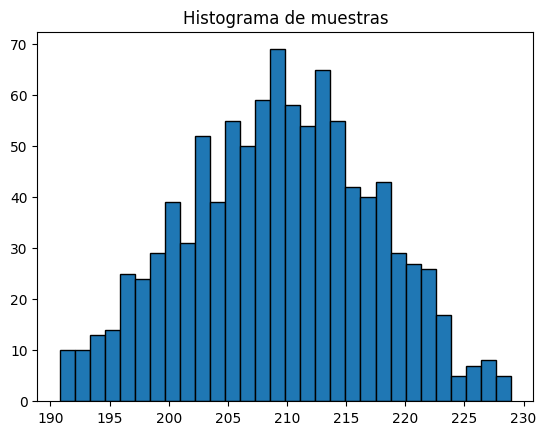

In [124]:
muestra = []

for i in range(1000):
    U = random.random()
    if U <= 0.5:
        x = 20 * np.sqrt(2 * U) + 190
    else:
        x = -20 * np.sqrt(2 * (1 - U)) + 230
    muestra.append(x)

plt.hist(muestra, bins=30, edgecolor='black')
plt.title('Histograma de muestras')
plt.show()

Ahora para obtener la probabilidad, usaremos la función Triangular para facilitar el desarrollo del mismo.

La probabilidad es: 0.99759
El costo es:  19951800


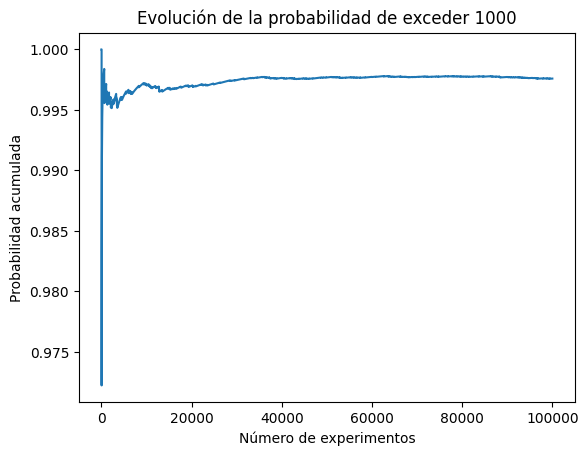

In [108]:
a = 190
b = 230
c = 210

def sim_tinas():
    costo = 0
    muestra = []
    N = 100000
    cont = 0

    for i in range(N):
        # Generar muestras
        u_1 = np.random.triangular(a, c, b)
        u_2 = np.random.triangular(a, c, b)
        u_3 = np.random.triangular(a, c, b)
        u_4 = np.random.triangular(a, c, b)
        u_5 = np.random.triangular(a, c, b)

        # Verificar si la suma de las muestras excede 1000
        suma = u_1 + u_2 + u_3 + u_4 + u_5
        if suma > 1000:
            cont += 1
            costo += 200

        prob = cont / (i + 1)
        muestra.append(prob)

    return muestra, costo, prob

muestra, costo, prob = sim_tinas()
print("La probabilidad es:", prob)
print("El costo es: ", costo)

plt.plot(muestra)
plt.xlabel('Número de experimentos')
plt.ylabel('Probabilidad acumulada')
plt.title('Evolución de la probabilidad de exceder 1000')
plt.show()

2. Analice la conveniencia de adquirir un nuevo camión. Para tal propósito, suponga que cada vez que la capacidad del camión es excedida una tina es enviada a través de otra compañía a un costo de 200. También suponga que el costo promedio anual de un nuevo camión es de 60, 000. Si se trabaja 5 días a la semana y 52 semanas al año, ¿cuál de las dos alternativas mencionadas es la más atractiva?

(a) Resolver analíticamente.

(b) Resolver por simulación.


***a)Analiticamente***
Sabemos de la información dada : 5días x 52 semanas = 260 días

Además sabemos que la probabilidad de que el peso de las tinas exceda la capacidad es de  $99.7 /%$

Entonces por regla de tres tenemos:

260 días ------ $100\%$

x        ------ $99\%$

$\Rightarrow   x= 259  $  días

Costo = 259 días x \$200 = 51800

Por lo que con la información dada que nos dice que el camión tiene un costo de 60,000, y el costo por envió de otra empresa es de 51800, entonces no conviene comprar el camión.


***b)Simulación***

En este caso para la simulación ahora N es el número de semanas ,después eso lo generamos por años

Obtenemos un promedio del precio anual, esa sería la respuesta del ejercicio y con ese dato tomamos la decisión.



Conviene pagar el excedente con un costo de: 51873.6


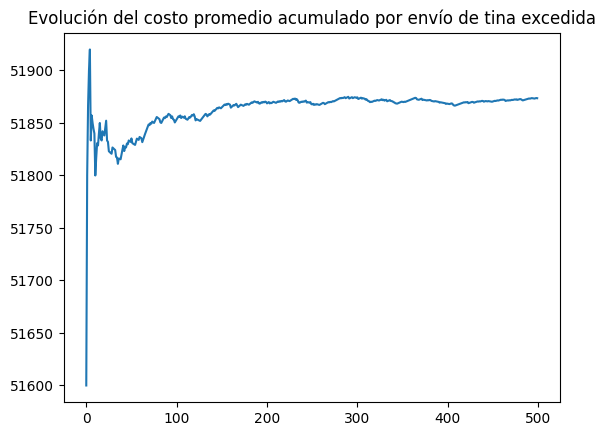

In [123]:
import numpy as np
import matplotlib.pyplot as plt

a = 190
b = 230
c = 210

def sim_tinas():
    tinas_excedidas = 0
    muestra = []
    n = 260  # Número de días de trabajo al año (5 días por semana * 52 semanas)

    for i in range(n):
        # Generar muestras
        u_1 = np.random.triangular(a, c, b)
        u_2 = np.random.triangular(a, c, b)
        u_3 = np.random.triangular(a, c, b)
        u_4 = np.random.triangular(a, c, b)
        u_5 = np.random.triangular(a, c, b)

        # Verificar si la suma de las muestras excede 1000
        suma = u_1 + u_2 + u_3 + u_4 + u_5
        if suma > 1000:
            tinas_excedidas += 1

        prob = tinas_excedidas / (i + 1)
        muestra.append(prob)

    costo = tinas_excedidas * 200
    return muestra, costo, prob

# Variables para acumular resultados de las simulaciones
N = 500  # Número de simulaciones
lista = []
l1 = []

for j in range(N):
    muestra, costo, prob = sim_tinas()
    lista.append(costo)
    l1.append(np.mean(lista[:j + 1]))

promedio = np.mean(lista)

if promedio < 60000:
    print("Conviene pagar el excedente con un costo de:", promedio)
else:
    print("No conviene pagar el costo $", promedio,"ya que excede lo del costo del camión.")


# Graficar la evolución del costo promedio acumulado
plt.plot(l1)
plt.title('Evolución del costo promedio acumulado por envío de tina excedida')
plt.show()

